In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns


In [28]:
data = pd.read_csv('data/injuries_cleaned.csv')
print(data.head())

       PlayerName   PlayerId   PlayerDOB  Height  Weight  \
0     Steve Blake  blakest01  1980-02-26    75.0   172.0   
1   Alan Anderson  anderal01  1982-10-16    78.0   220.0   
2   Arron Afflalo  afflaar01  1985-10-15    77.0   210.0   
3   Bobby Simmons  simmobo01  1980-06-02    79.0   210.0   
4  D.J. Augustine  augusdj01  1987-11-10    71.0   183.0   

                                      Positions GroupPosition  DraftPick  \
0                                   Point Guard             G       38.0   
1                 Small Forward, Shooting Guard             F        NaN   
2                 Small Forward, Shooting Guard             G       27.0   
3  Power Forward, Small Forward, Shooting Guard             F       41.0   
4                                   Point Guard             G        9.0   

   IsActive  FirstSeason  ...  DaysBetweenGames  BodyPartInjured  \
0     False       2004.0  ...              79.0        abdominal   
1     False       2006.0  ...             203.

In [29]:
data['DateInjured'] = pd.to_datetime(data['DateInjured'])
data['PlayerDOB'] = pd.to_datetime(data['PlayerDOB'])

In [30]:
data['AgeAtInjury'] = data['DateInjured'].apply(lambda x: x.year) - data['PlayerDOB'].apply(lambda x: x.year)

<Figure size 1000x1000 with 0 Axes>

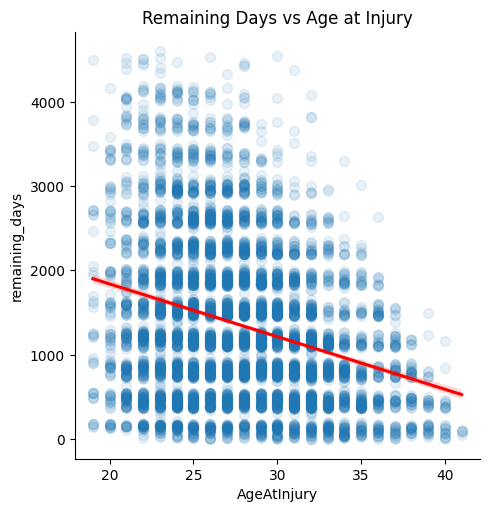

<Figure size 1000x1000 with 0 Axes>

In [56]:
sns.lmplot(data=data, x='AgeAtInjury', y='remaining_days', scatter_kws={'s': 50, 'alpha': 0.1}, line_kws={'color': 'red'})
plt.title('Remaining Days vs Age at Injury')
plt.figure(figsize=(10, 10))


In [64]:
part_counts = data['BodyPartInjured'].value_counts()
high_count = part_counts.index[part_counts >= 200]
high_count_df = data[data['BodyPartInjured'].isin(high_count)]
order = high_count_df.groupby('BodyPartInjured').remaining_days.median().sort_values(ascending=True).index

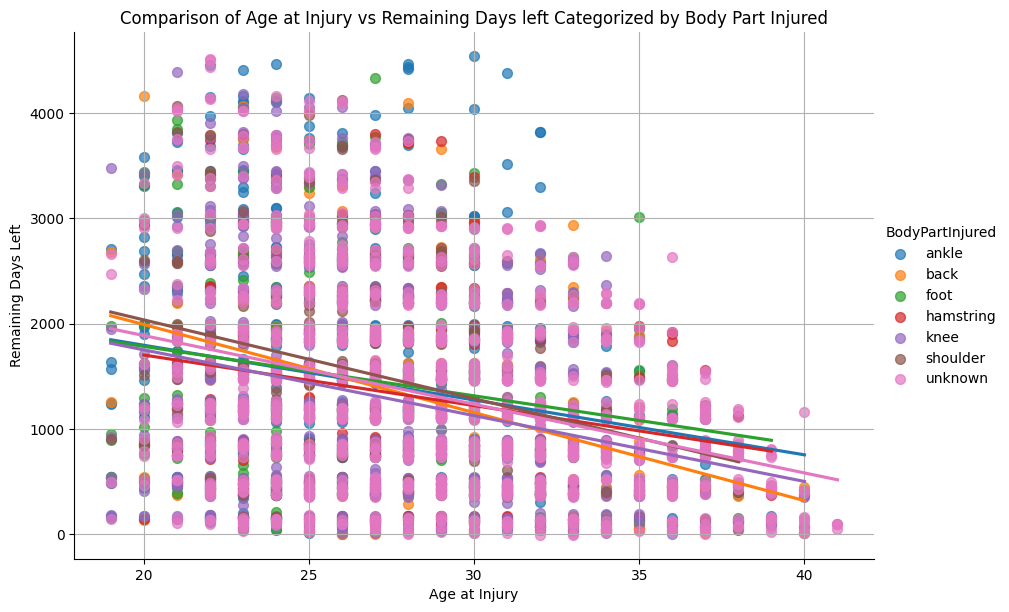

In [67]:
sns.lmplot(data=data[data['BodyPartInjured'].isin(high_count)], x='AgeAtInjury', y='remaining_days', hue='BodyPartInjured', aspect=1.5, height=6, markers='o', ci=None, scatter_kws={'s': 50, 'alpha': 0.7})
plt.title('Comparison of Age at Injury vs Remaining Days left Categorized by Body Part Injured')
plt.xlabel('Age at Injury')
plt.ylabel('Remaining Days Left')
plt.grid(True)
# plt.legend(title='Body Part Injured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='AgeAtInjury', ylabel='DaysInjured'>

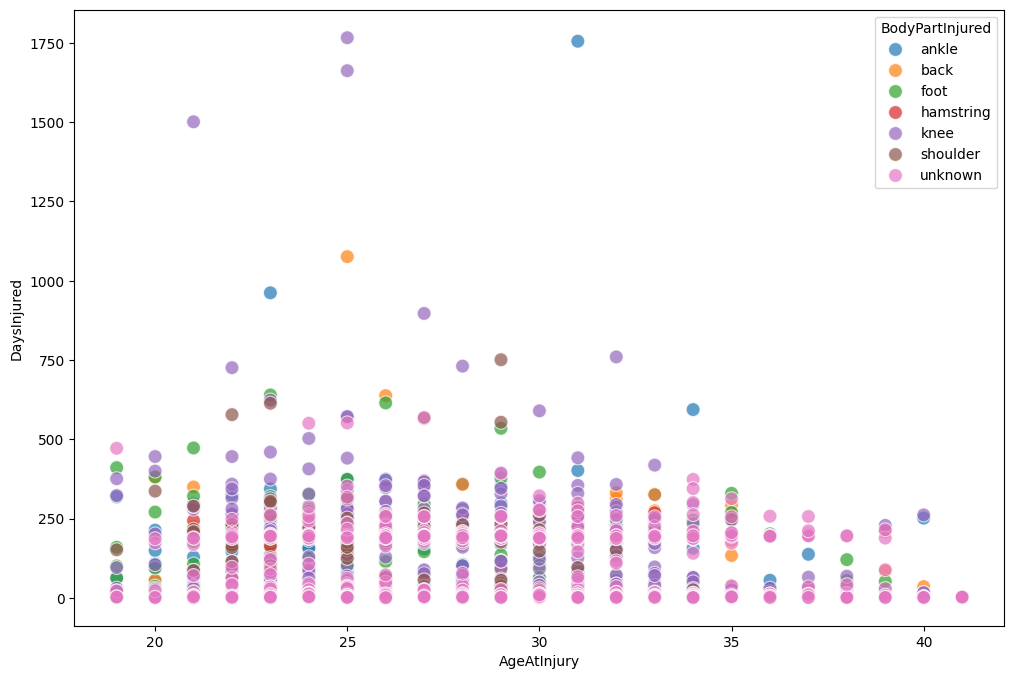

In [68]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data[data['BodyPartInjured'].isin(high_count)], x='AgeAtInjury', y='DaysInjured', hue='BodyPartInjured', alpha=0.7, s=100)


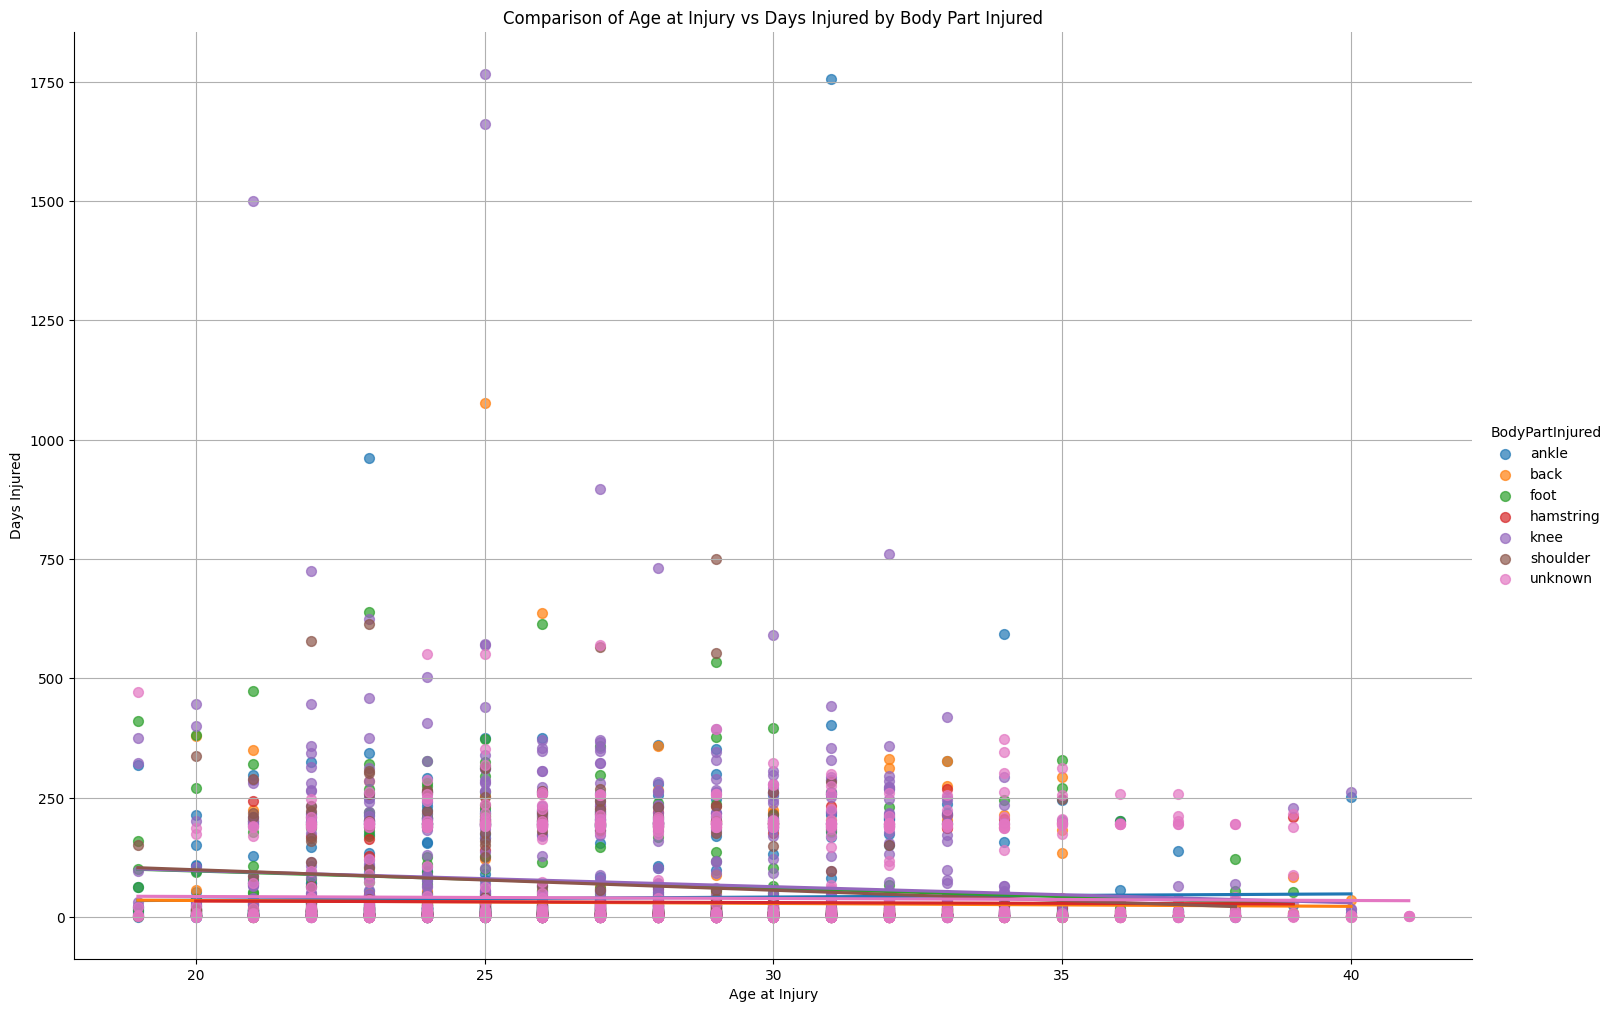

In [72]:
sns.lmplot(data=data[data['BodyPartInjured'].isin(high_count)], x='AgeAtInjury', y='DaysInjured', hue='BodyPartInjured', aspect=1.5, height=10, markers='o', scatter_kws={'s': 50, 'alpha': 0.7}, ci=None)
plt.title('Comparison of Age at Injury vs Days Injured by Body Part Injured')
plt.xlabel('Age at Injury')
plt.ylabel('Days Injured')
plt.grid(True)
# plt.legend(title='Body Part Injured', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()